# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Graph plots in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Setup

In [1]:
import os
from lightning import Lightning

from numpy import random, asarray, argmin
from colorsys import hsv_to_rgb
import networkx as nx

## Connect to server


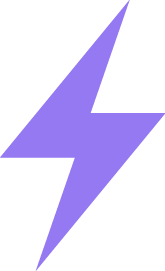

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [2]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

## <hr> Random spatial graphs

Spatial graphs have nodes with fixed spatial positions, and links between them.
<br>
They are useful for spatial network data, where position has meaning (unlike force-directed graphs, where position is used dynamically during rendering).
<br>
First we'll generate a random geometric graph using `networkx` and plot with basic styling.
<br>
The random geometric graph places links between nodes with probability that depends on their spatial distance.

In [3]:
G = nx.random_geometric_graph(100, 0.2)
pos = asarray(nx.get_node_attributes(G, 'pos').values())
mat = nx.adjacency_matrix(G).todense()

In [4]:
lgn.graph(pos[:,0], pos[:,1], mat)

We can add a color to each node. Here we color the same graph based on distance from the origin.

In [5]:
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in pos]
lgn.graph(pos[:,0], pos[:,1], mat, values=dists, colormap='Greens')

As with other plots, we can also color using group labels.
<br>
Here we assign a label to each point based on the shortest path from it to the center.

In [6]:
center = argmin(dists)
p = nx.single_source_shortest_path_length(G, center)
xy = asarray([pos[i,:] for i in p.keys()])
g = p.values()
lgn.graph(xy[:,0], xy[:,1], mat, group=g)

## <hr> Edge bundling

Graphs with many edges can become hard to visualize (due to hairballs).
<br>
Lightning helps with this by letting you click on points and see only the links to that node. Try it!

In [7]:
G = nx.random_geometric_graph(50, 0.5)
pos = asarray(nx.get_node_attributes(G, 'pos').values())
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in pos]
mat = nx.adjacency_matrix(G).todense()

In [8]:
lgn.graph(pos[:,0], pos[:,1], mat)

Another option is to bundle edges together using an algorithm by Holton and Van Wijk, emphasizing large tracts.
See this [link](https://github.com/upphiminn/d3.ForceBundle) for the implementaiton.
<br>
As with the unbundled version, you can click on points to highlight links.

In [9]:
lgn.graphbundled(pos[:,0], pos[:,1], mat)